In [1]:
import tensorflow as tf
import cv2
import os 
import matplotlib.pyplot as plt
import numpy as np



In [2]:
img_array = cv2.imread("test\close_eyes\s0001_00210_0_0_0_0_0_01.png",1)


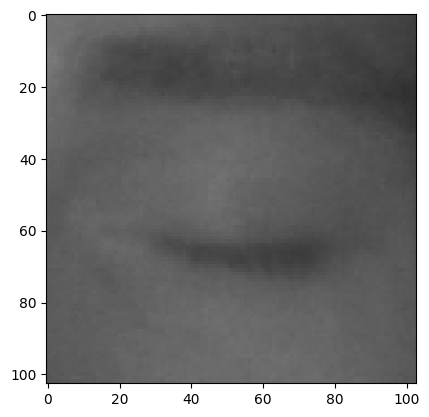

In [3]:
img=plt.imshow(img_array,cmap="gray")

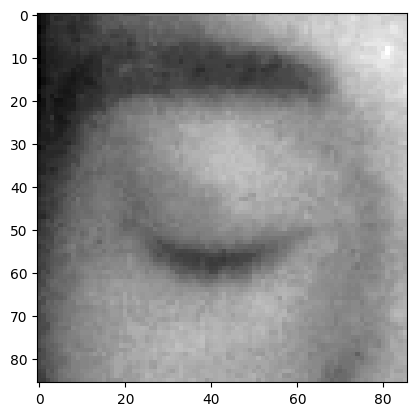

In [4]:
Datadirectory = "test/"
Classes = ["close_eyes","open_eyes"]
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

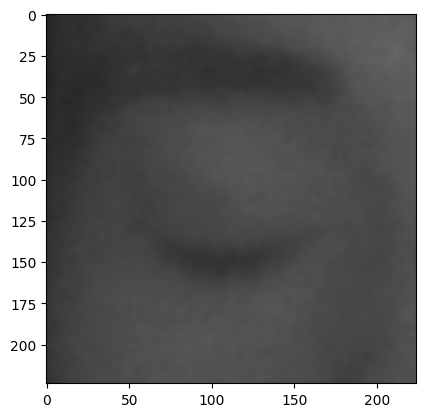

In [5]:
img_size = 224
new_array = cv2.resize(backtorgb, (img_size,img_size))
plt.imshow(new_array, cmap="gray")
plt.show()

In [6]:
training_Data = []
def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
                new_array = cv2.resize(backtorgb, (img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass

In [7]:
create_training_Data()

In [8]:
print(len(training_Data))

4216


In [9]:
import random
random.shuffle(training_Data)

In [10]:
X=[]
y=[]

for features,label in training_Data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 3)

In [11]:
X.shape

(4216, 224, 224, 3)

In [12]:
X= X/255.0

In [13]:
Y = np.array(y)

In [14]:
import pickle




In [15]:
pickle_out = open("X.pickle1","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle1","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [16]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

UnpicklingError: pickle data was truncated

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
model = tf.keras.applications.mobilenet.MobileNet()

In [ ]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [ ]:
base_input = model.layers[0].input

In [ ]:
base_output = model.layers[-4].output

In [ ]:
Flat_layers = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layers)
final_output = layers.Activation('sigmoid')(final_output)

In [ ]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [ ]:
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [ ]:
new_model.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [ ]:
new_model.fit(X,Y, epochs = 1,validation_split = 0.1)

NameError: name 'X' is not defined

In [ ]:
new_model.save('my_model3.h5')

In [ ]:
new_model = tf.keras.models.load_model('my_model2.h5')

In [ ]:
img_array = cv2.imread('s0001_00004_0_0_0_0_0_01.png',cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(backtorgb, (img_size,img_size))

In [ ]:
X_input = np.array(new_array).reshape(1, img_size, img_size, 3)

In [ ]:
X_input.shape

(1, 224, 224, 3)

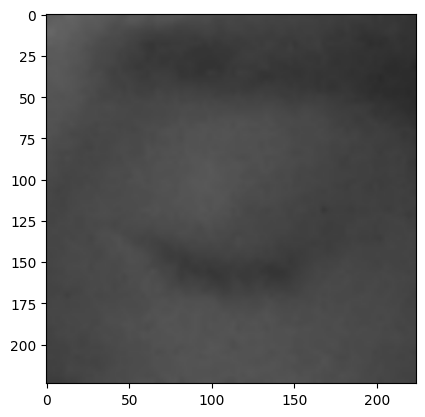

In [ ]:
plt.imshow(new_array)

In [ ]:
X_input=X_input/255.0

In [ ]:
prediction = new_model.predict(X_input)

1/1 [==============================] - 4s 4s/step


In [ ]:
prediction

array([[0.04287395]], dtype=float32)

In [ ]:
img = cv2.imread('man.jfif')

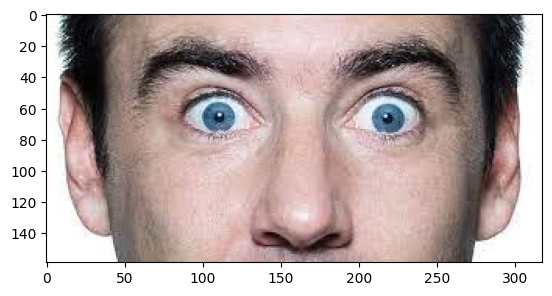

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [ ]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [ ]:
eyes = eye_cascade.detectMultiScale(gray,1.1,4)

In [ ]:
for(x, y, w, h) in eyes:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0,255,0), 2)

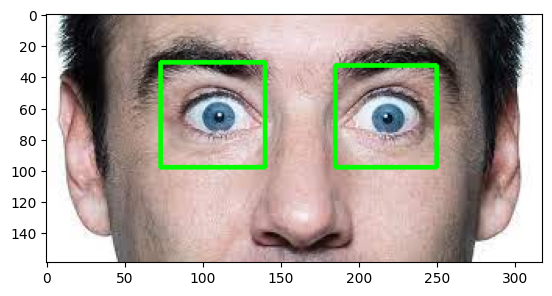

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
eyes = eye_cascade.detectMultiScale(gray,1.1,4)
for (x, y, w, h) in eyes:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyess = eye_cascade.detectMultiScale(roi_gray)
    if len(eyess) == 0:
        print("eyes are not detected")
    else:
        for (ex,ey,ew,eh) in eyess:
            eyes_roi = roi_color[ey:ey+eh, ex:ex+ew]

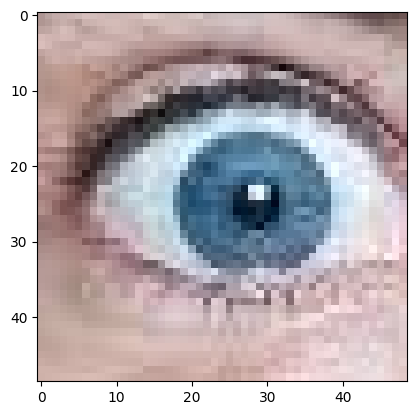

In [ ]:
plt.imshow(cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))

In [ ]:
eyes_roi.shape

(49, 49, 3)

In [ ]:
final_image = cv2.resize(eyes_roi, (224,224))
final_image = np.expand_dims(final_image,axis =0)
final_image= final_image/255.0

In [ ]:
final_image.shape

(1, 224, 224, 3)

In [ ]:
new_model.predict(final_image)

1/1 [==============================] - 0s 74ms/step


array([[1.]], dtype=float32)

In [ ]:
import cv2
import pygame
path = "haarcascade_frontalface_default.xml"
pygame.mixer.init()
alarm = pygame.mixer.Sound("alarm.wav")

# Define the alarm threshold (number of consecutive blinks)
ALARM_THRESHOLD = 10

# Define the function to play the alarm
def play_alarm():
    pygame.mixer.Sound.play(alarm)
    
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
cap =cv2.VideoCapture(1)
if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open WebCam")
while True:
    ret,frame = cap.read()
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    eyes = eye_cascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in eyes:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,255,0), 2)
        eyess = eye_cascade.detectMultiScale(roi_gray)
        if len(eyess) == 0:
            print("eyes are not detected")
        else:
            for (ex,ey,ew,eh) in eyess:
                eyes_roi = roi_color[ey:ey+eh, ex:ex+ew]
    final_image = cv2.resize(eyes_roi, (224,224))
    final_image = np.expand_dims(final_image,axis =0)
    final_image= final_image/255.0
    
    Predictions = new_model.predict(final_image)
    if (Predictions<1.0):
        status = "Close Eyes"
        play_alarm()
    else:
        status = "Open Eyes"
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    print(faceCascade.empty())
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    
    for (x,y,w,h) in faces:
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,255,0), 2)
    
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    
    cv2.putText(frame, status, (50,50), font, 3, (0,0,255), 2, cv2.LINE_4)
    cv2.imshow('Drowsiness Detection Alarm',frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 74ms/step
False
1/1 [==============================] - 0s 106ms/step
False
1/1 [==============================] - 0s 71ms/step
False
1/1 [==============================] - 0s 70ms/step
False
1/1 [==============================] - 0s 71ms/step
False
1/1 [==============================] - 0s 71ms/step
False
1/1 [==============================] - 0s 73ms/step
False
1/1 [==============================] - 0s 70ms/step
False
1/1 [==============================] - 0s 74ms/step
False
eyes are not detected
1/1 [==============================] - 0s 69ms/step
False
eyes are not detected
1/1 [==============================] - 0s 67ms/step
False
eyes are not detected
1/1 [==============================] - 0s 68ms/step
False
eyes are not detected
1/1 [==============================] - 0s 69ms/step
False
eyes are not detected
eyes are not detected
1/1 [==============================] - 0s 67ms/step
False
eyes are not detected
eyes are not detected
1/1 [======